In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [75]:
df = pd.read_csv('files/weatherAUS_sin_nan.csv')
# df = df.drop("Unnamed: 0", axis=1)

In [76]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow,Cluster
0,2008-12-01,Albury,13.4,22.9,0.6,8.066667,11.55,W,44.0,W,...,1007.7,1007.1,8.0,5.666667,16.9,21.8,No,No,0.0,7
1,2008-12-02,Albury,7.4,25.1,0.0,9.533333,10.35,WNW,44.0,NNW,...,1010.6,1007.8,3.5,6.000000,17.2,24.3,No,No,0.0,7
2,2008-12-03,Albury,12.9,25.7,0.0,7.333333,9.95,WSW,46.0,W,...,1007.6,1008.7,4.5,2.000000,21.0,23.2,No,No,0.0,7
3,2008-12-04,Albury,9.2,28.0,0.0,7.533333,8.30,NE,24.0,SE,...,1017.6,1012.8,4.0,7.333333,18.1,26.5,No,No,1.0,7
4,2008-12-05,Albury,17.5,32.3,1.0,6.400000,10.75,W,41.0,ENE,...,1010.8,1006.0,7.0,8.000000,17.8,29.7,No,No,0.2,7


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136497 entries, 0 to 136496
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              136497 non-null  object 
 1   Location          136497 non-null  object 
 2   MinTemp           136497 non-null  float64
 3   MaxTemp           136497 non-null  float64
 4   Rainfall          136497 non-null  float64
 5   Evaporation       136497 non-null  float64
 6   Sunshine          136497 non-null  float64
 7   WindGustDir       136497 non-null  object 
 8   WindGustSpeed     136497 non-null  float64
 9   WindDir9am        136497 non-null  object 
 10  WindDir3pm        136497 non-null  object 
 11  WindSpeed9am      136497 non-null  float64
 12  WindSpeed3pm      136497 non-null  float64
 13  Humidity9am       136497 non-null  float64
 14  Humidity3pm       136497 non-null  float64
 15  Pressure9am       136497 non-null  float64
 16  Pressure3pm       13

In [78]:
#Show all diferent cities
cities=df['Location'].unique()
print(cities)

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'Walpole'
 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine' 'Uluru']


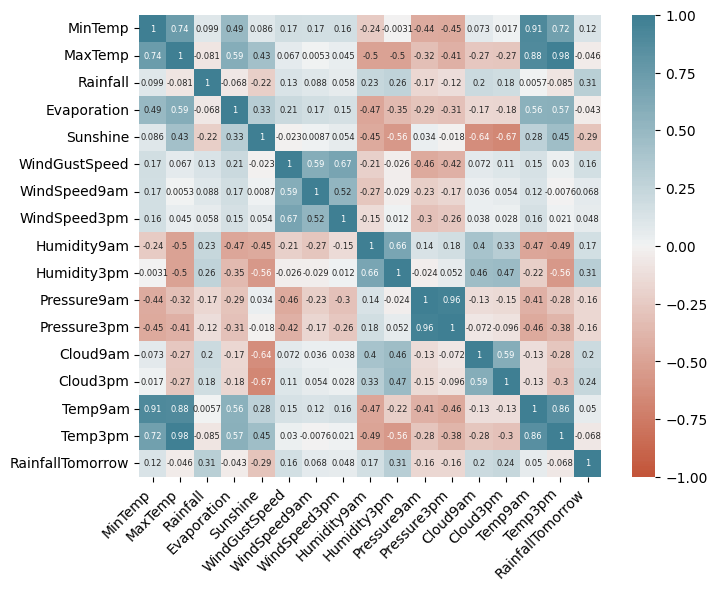

In [79]:
corr = df.select_dtypes(include=['number']).drop("Cluster", axis=1).corr()

#mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(8, 6))

ax = sns.heatmap(
    corr,
    #mask = mask,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6},
    
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

In [80]:
grupos_ciudades = df.groupby('Cluster')

In [81]:
df = df.dropna()

Valores atípicos para el grupo '0':
{'MinTemp': 545     -3.062801
15575   -3.211297
15576   -3.396917
15920   -3.081363
16949   -3.118487
Name: MinTemp, dtype: float64, 'MaxTemp': 5        2.721304
6        2.896682
13       2.826531
14       3.352666
19       2.703766
           ...   
27398    2.738842
27838    2.756379
28477    2.914220
28487    3.264976
29494    2.808993
Name: MaxTemp, Length: 414, dtype: float64, 'Rainfall': 11       0.131778
21       1.806247
26       0.088285
41       0.197017
42       0.153524
           ...   
30050    1.953639
30051    0.175271
30052    0.262256
30053    2.415145
30054    4.089614
Name: Rainfall, Length: 5786, dtype: float64, 'Evaporation': 38       2.240434
39       2.177181
333      2.450435
760      3.978631
766      3.644654
           ...   
29852    2.915978
29859    3.513088
29866    3.277786
29883    8.330448
29895    2.835014
Name: Evaporation, Length: 706, dtype: float64, 'WindGustSpeed': 83       2.885560
84       2.600833
218     

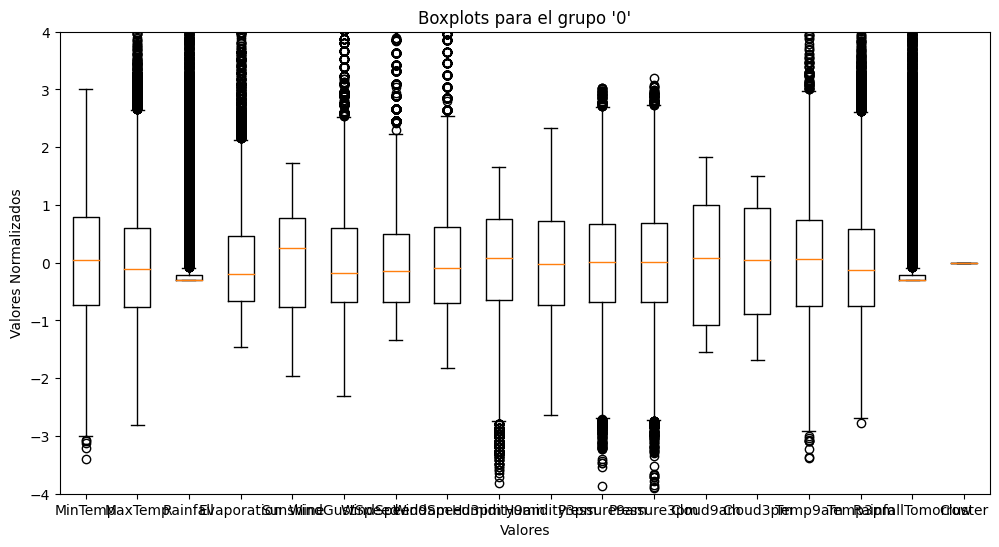

Valores atípicos para el grupo '2':
{'Rainfall': 1       0.091013
4      -0.140097
5       0.414568
6       0.923011
7      -0.047653
          ...   
3348   -0.140097
3352    0.137236
3356    1.986120
3365   -0.093875
3366   -0.140097
Name: Rainfall, Length: 409, dtype: float64, 'Evaporation': 45      2.970102
275     3.144559
325     3.013717
647     2.970102
906     2.970102
1459    6.153943
1856    7.157071
1935    5.892257
2236    3.275402
2241    3.667930
2285    3.493473
2532    6.153943
2929    7.157071
3008    5.892257
3309    3.275402
3314    3.667930
3358    3.493473
Name: Evaporation, dtype: float64, 'Sunshine': 4      -1.658814
5      -2.840180
6      -2.264643
10     -1.628523
26     -1.992020
          ...   
3300   -2.900763
3311   -1.567940
3347   -2.537266
3365   -1.779980
3374   -1.598231
Name: Sunshine, Length: 376, dtype: float64, 'WindGustSpeed': 0       4.330854
3       2.906275
25      2.621360
54      4.900686
57      2.621360
          ...   
3220    2.621360


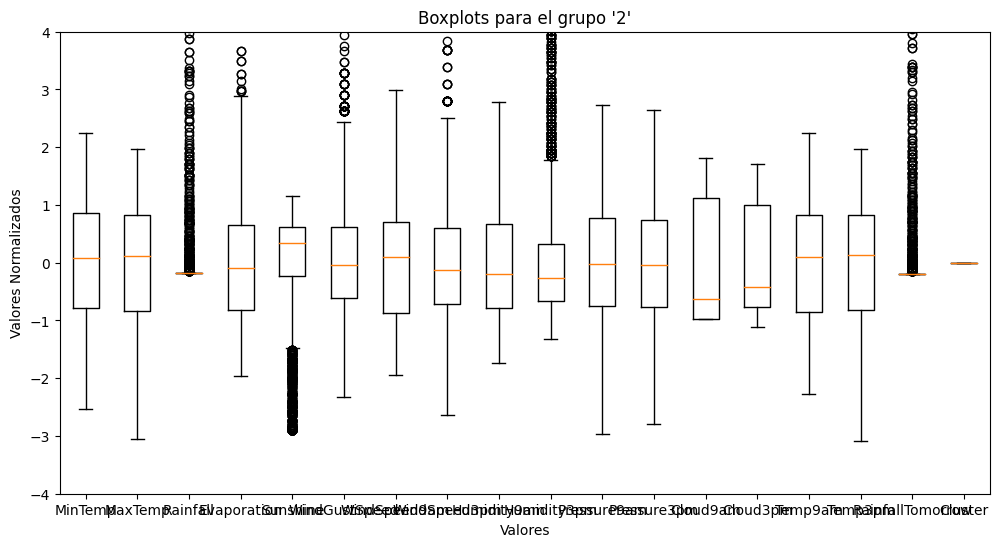

Valores atípicos para el grupo '3':
{'MinTemp': 27       2.827861
28       2.884726
29       2.733085
30       3.093233
31       2.695174
           ...   
22439    2.998457
22445    2.998457
22449    3.586067
22450    3.623977
22451    3.320695
Name: MinTemp, Length: 322, dtype: float64, 'MaxTemp': 27       2.876558
30       2.929623
37       3.274551
374      2.942890
375      2.863291
           ...   
22428    2.850025
22448    3.194952
22449    3.287817
22450    3.194952
22451    3.194952
Name: MaxTemp, Length: 98, dtype: float64, 'Rainfall': 69       1.173254
71       2.679249
113      1.388396
115      0.915083
117      1.216282
           ...   
22435    1.603538
22517    1.151740
22518    1.646567
22522    4.443414
22544    1.732623
Name: Rainfall, Length: 3759, dtype: float64, 'Evaporation': 14       3.202251
20       2.629167
22       2.670102
28       2.588232
29       2.178886
           ...   
22463    2.178886
22479    2.629167
22488    2.178886
22490    2.915709
22493  

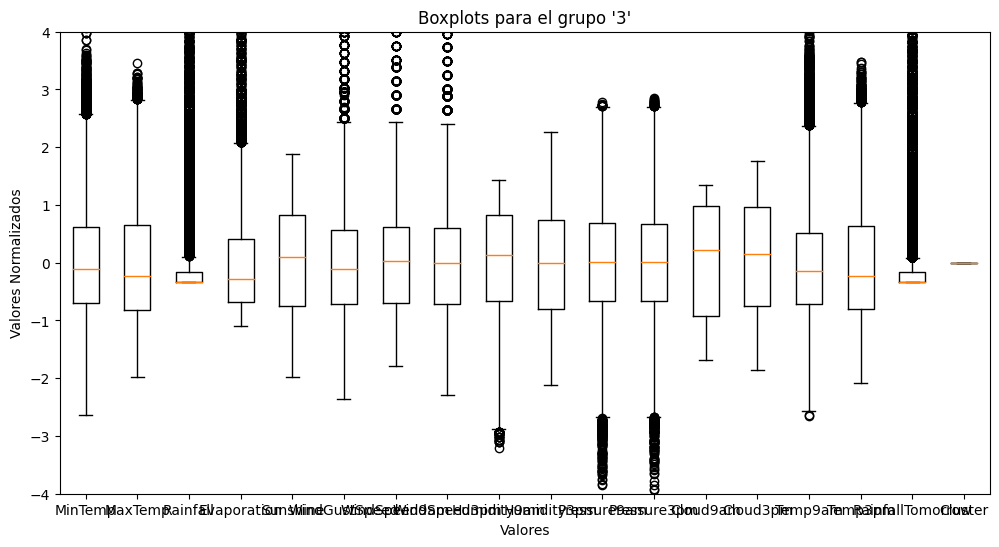

Valores atípicos para el grupo '4':
{'MinTemp': 3563    -2.876045
6407     3.083577
6427     3.683986
6428     2.816728
6465     2.994627
           ...   
13640    2.883440
13647    3.350426
13981    3.884123
14706    2.972390
14772    3.061339
Name: MinTemp, Length: 69, dtype: float64, 'MaxTemp': 413      2.588884
2503     2.697456
2816     2.605334
3419     2.654685
3420     2.555983
           ...   
15255    2.506632
15675    2.523083
16644    2.654685
17373    2.523083
17741    2.671136
Name: MaxTemp, Length: 339, dtype: float64, 'Rainfall': 3        0.931663
9        2.042633
59       0.561340
89       0.696003
90       0.527674
           ...   
18222    0.763334
18226    0.292014
18233    3.288265
18239    3.220933
18242    2.210961
Name: Rainfall, Length: 3251, dtype: float64, 'Evaporation': 2503     4.645758
2506     3.577503
2732     3.137633
2780     8.855939
2787     5.148466
2794     8.918777
2822     4.645758
2829     5.651174
2836     4.708596
2843     5.274143
2850   

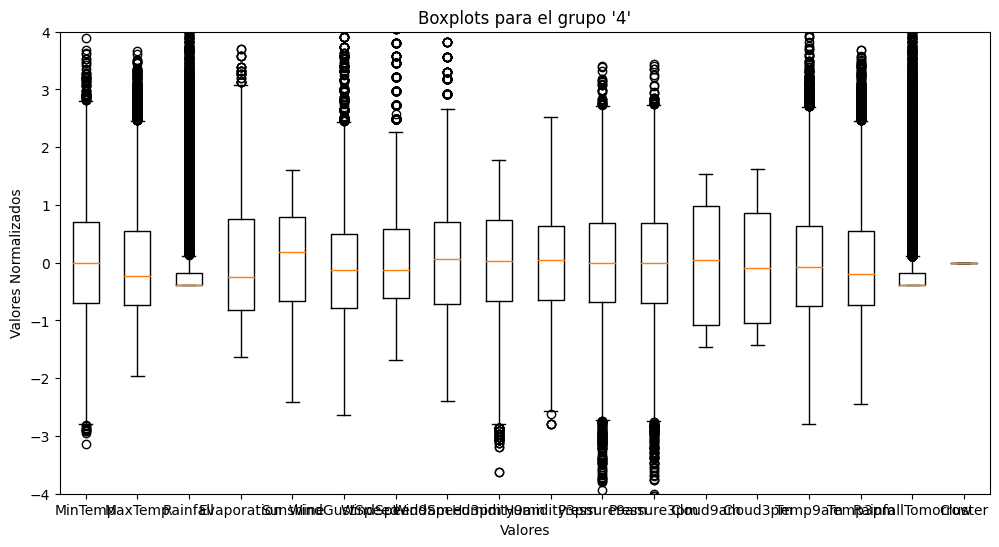

Valores atípicos para el grupo '5':
{'MinTemp': 893    -2.659089
895    -2.559335
928    -2.584274
929    -2.833659
930    -2.833659
          ...   
4932   -2.808720
4933   -3.382306
4934   -3.083044
4935   -2.783782
4940   -2.933413
Name: MinTemp, Length: 99, dtype: float64, 'MaxTemp': 430     2.867963
1231   -2.903194
1445    3.060335
1446    2.944912
1447    3.522027
1912   -3.518784
1913   -3.172515
1919   -3.057092
2527    3.252707
3230   -2.903194
3485   -3.134040
3486   -4.211323
3487   -2.941668
3829   -3.826579
3830   -3.518784
3835   -2.980143
3859   -3.172515
3860   -3.595733
3869   -2.980143
3875   -2.864720
3880   -3.210989
3881   -3.134040
3894   -2.864720
4043    3.406604
4045    2.944912
4510   -3.518784
4511   -3.749630
4516   -3.595733
4517   -3.095566
4519   -3.865054
4577   -2.941668
5083    3.175758
5084    3.406604
5125    3.175758
Name: MaxTemp, dtype: float64, 'Rainfall': 1       0.249277
8       0.010105
14      1.722075
17     -0.052835
22      0.400333
     

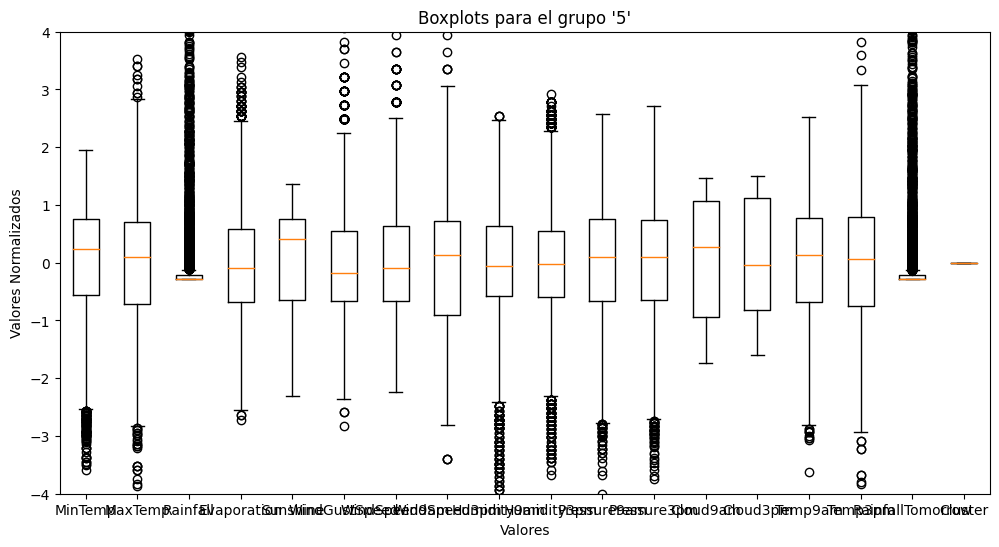

Valores atípicos para el grupo '6':
{'Rainfall': 9       6.501793
17      1.564345
36      2.295819
38      0.528091
40      2.752990
          ...   
2437    1.229086
2441    3.210161
2450    1.503389
2462    0.741437
2463    0.619525
Name: Rainfall, Length: 372, dtype: float64, 'Evaporation': 9       5.504573
91      3.180486
330     2.863565
337     3.391766
360     3.391766
388     2.969205
428     2.757924
629     3.286126
720     2.863565
721     3.074845
723     2.969205
724     2.969205
763     2.863565
1375    2.863565
1671    2.863565
Name: Evaporation, dtype: float64, 'WindGustSpeed': 9       3.123294
172     3.123294
173     2.878345
177     3.286593
182     3.041645
183     3.123294
184     3.939790
221     3.449892
246     3.123294
476     3.286593
479     3.041645
503     2.715046
509     2.715046
531     3.123294
532     2.715046
724     3.449892
726     3.613191
842     2.715046
843     2.715046
897     3.939790
924     2.715046
1011    3.776490
1026    2.715046
1153  

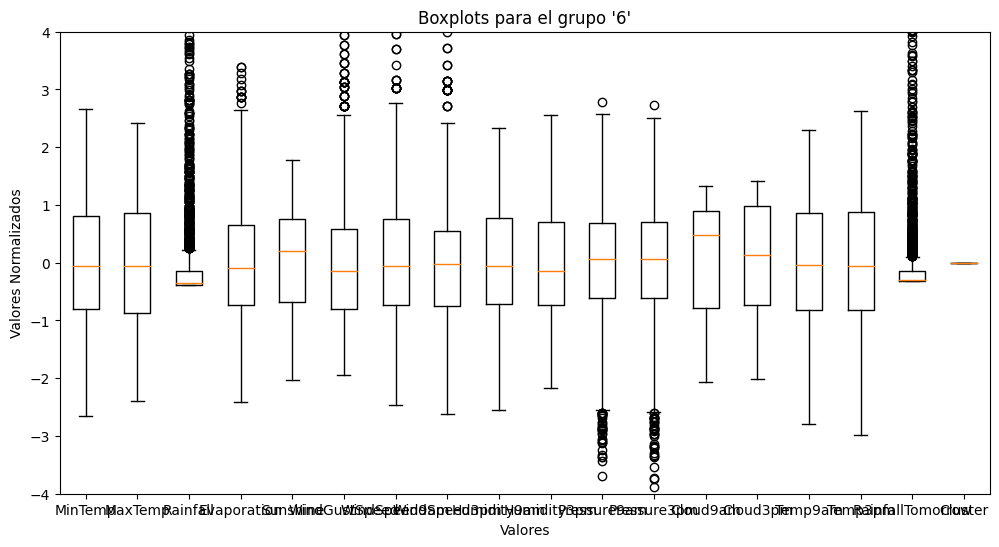

Valores atípicos para el grupo '7':
{'MinTemp': 62       3.359879
69       3.411423
1758     2.878810
2136     3.016258
2511     3.153707
3053     2.947534
3067     2.895991
3070     3.170888
3074     2.981896
3075     2.878810
3076     3.016258
3077     3.445785
3396     3.359879
3415     3.153707
3426     2.930353
4438     2.878810
4444     2.878810
4446     3.016258
5519     3.136526
5895     3.084983
7363    -2.825298
10402   -2.859660
12692   -2.911204
13075   -2.825298
14848   -2.859660
15598    2.861629
18639    2.930353
18985    3.239612
20361    3.462966
21064    3.531690
21144    2.981896
21449    3.050620
24653    3.789406
25001    3.497328
26376    3.377060
27080    2.861629
27452    2.930353
27465    3.016258
27845    2.964715
27846    2.964715
28216    2.930353
29260    3.102164
29568    3.462966
29569    3.188069
29570    2.947534
30644    2.913172
30647    3.188069
30657    3.359879
32268    2.878810
32576    3.359879
33655    3.084983
33665    3.377060
Name: MinTemp, d

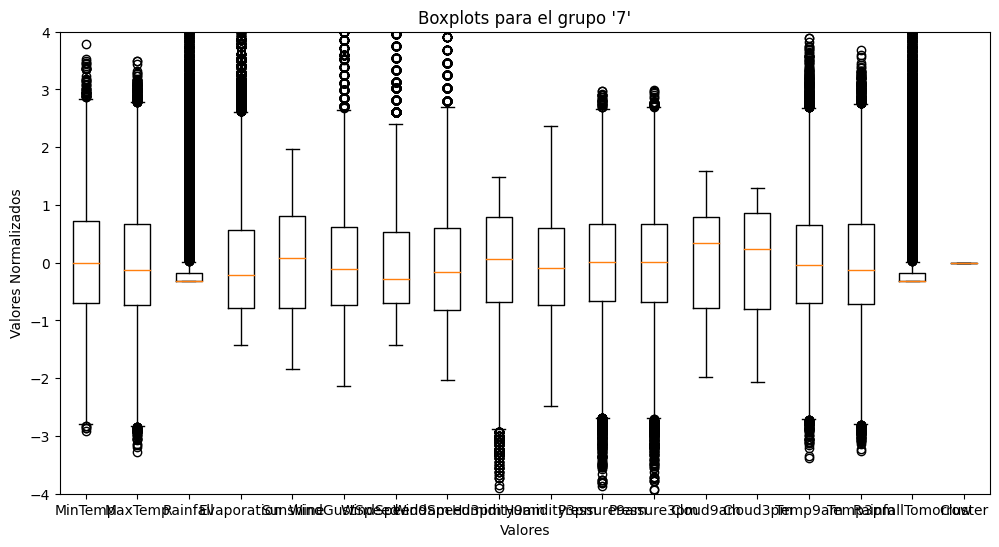

Valores atípicos para el grupo '8':
{'MinTemp': 26     -2.464882
1001   -2.414800
1002   -2.339678
2092   -2.339678
3208   -2.865535
          ...   
4681   -2.965699
4682   -2.940658
4683   -2.565045
4685   -2.489923
4688   -2.540004
Name: MinTemp, Length: 186, dtype: float64, 'MaxTemp': 203    -2.701326
813    -3.057400
916    -3.373910
917    -2.543071
956    -2.661762
          ...   
4496    2.679347
4497    2.441964
4616   -2.899145
4675   -2.622198
4678   -2.424379
Name: MaxTemp, Length: 207, dtype: float64, 'Rainfall': 81      0.101700
95      1.234240
102     4.465311
103     0.817865
105     1.783855
          ...   
4600   -0.181435
4601    0.984415
4617   -0.148125
4618    0.334870
4619    0.667970
Name: Rainfall, Length: 1053, dtype: float64, 'Evaporation': 82      2.491392
102     2.580822
195     4.548275
524    -2.337812
526    -2.784960
          ...   
4594    4.637705
4608    2.401962
4616    5.532002
4617   -2.695530
4665    2.401962
Name: Evaporation, Length: 135, 

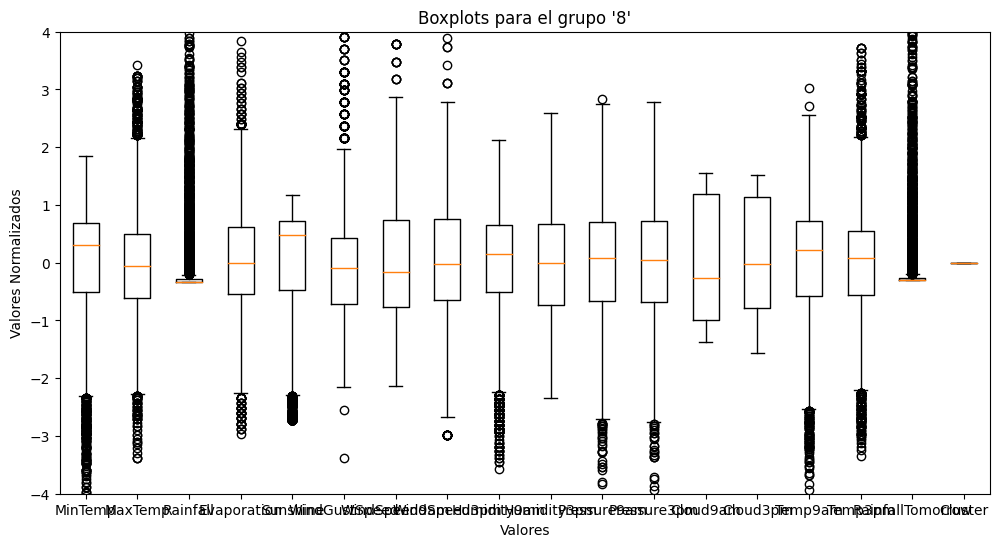

Valores atípicos para el grupo '9':
{'MinTemp': 3154   -3.017782
3155   -3.180304
3206   -2.873318
3536   -3.360884
3537   -3.180304
3538   -3.053898
3542   -3.198362
3576   -2.909434
3827   -2.909434
3852   -2.981666
3853   -3.270594
3882   -2.981666
3883   -3.162246
3885   -3.342826
4233   -3.053898
4234   -3.090014
4244   -3.053898
4272   -2.963608
4553   -2.999724
4597   -2.963608
4598   -2.855260
4918   -2.909434
4921   -2.981666
4943   -2.855260
5632   -2.873318
5636   -2.981666
5648   -2.927492
Name: MinTemp, dtype: float64, 'MaxTemp': 1358    2.771731
3008    2.957843
3032    3.040560
3312    3.081918
3313    3.474821
          ...   
5853    3.019881
5854    3.867725
5855    4.446740
5860    2.833769
5861    2.999202
Name: MaxTemp, Length: 98, dtype: float64, 'Rainfall': 2        0.087591
8        0.335347
9       -0.020803
16       0.226953
17       0.288892
           ...   
12165    1.403795
12166    3.757477
12167    0.908283
12168    1.109584
12169    0.939252
Name: Rainf

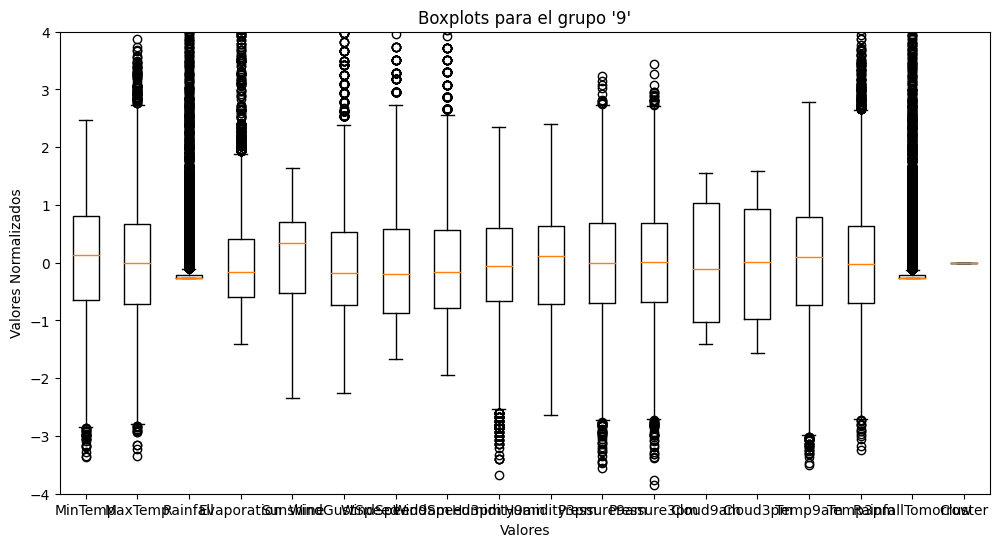

Valores atípicos para el grupo '10':
{'MinTemp': 199    2.998187
Name: MinTemp, dtype: float64, 'MaxTemp': 182     3.051663
486     2.871150
511     3.151947
526     4.014394
537     3.653370
538     3.091776
557     3.412687
847     3.131890
1101    3.192061
1150    3.292346
1405    2.851093
1451    3.553085
1469    3.232175
1510    2.891207
2038    2.891207
2052    3.111833
2053    3.733598
2054    4.154793
2055    3.994337
2421    3.011549
3299    2.911264
3312    2.871150
3313    3.051663
Name: MaxTemp, dtype: float64, 'Rainfall': 0       0.257724
1       3.009113
2       0.257724
7       1.383292
10      0.174349
          ...   
3824    2.175358
3830    0.132661
3845    0.257724
3847    0.757976
3848    1.424980
Name: Rainfall, Length: 699, dtype: float64, 'Evaporation': 183     2.519710
192     2.971154
527     2.971154
558     3.046394
578     2.670191
          ...   
3676    6.206500
3683    2.594951
3691    2.670191
3700    2.895913
3701    2.594951
Name: Evaporation, Length

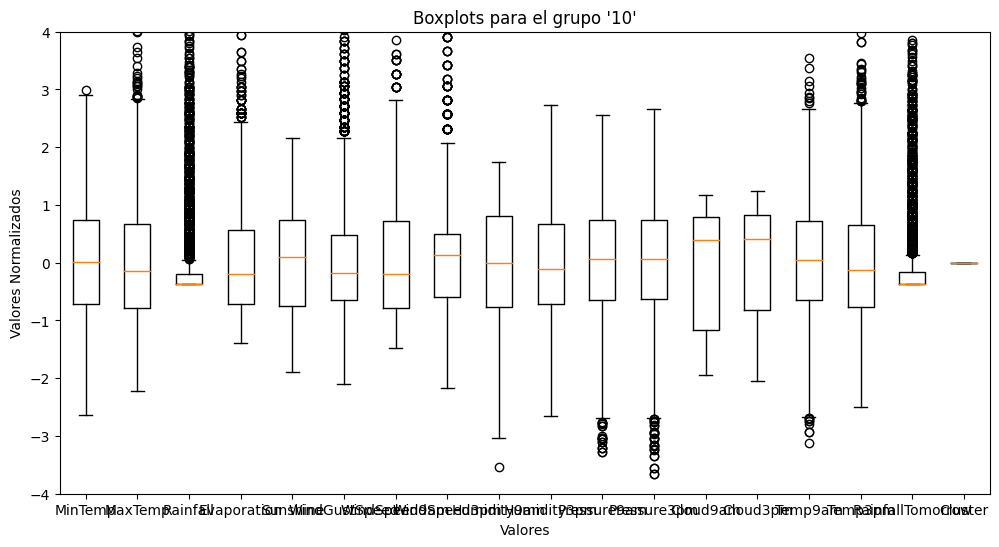

In [84]:
# 1. Eliminar filas con datos faltantes y calcular outliers para cada grupo
for nombre, grupo in grupos_ciudades:
    
    # Seleccionar solo las columnas numéricas dentro del grupo sin faltantes
    columnas_numericas = grupo.select_dtypes(include=['number'])
    
    # Normalizar las columnas numéricas
    scaler = StandardScaler()
    columnas_numericas_normalized = pd.DataFrame(scaler.fit_transform(columnas_numericas), columns=columnas_numericas.columns)
    
    # Calcular los valores atípicos para las columnas numéricas normalizadas
    Q1 = columnas_numericas_normalized.quantile(0.25)
    Q3 = columnas_numericas_normalized.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    valores_atipicos = {}
    for col in columnas_numericas_normalized.columns:
        valores = columnas_numericas_normalized[col][(columnas_numericas_normalized[col] < limite_inferior[col]) | (columnas_numericas_normalized[col] > limite_superior[col])]
        if not valores.empty:
            valores_atipicos[col] = valores

    # # Imprimir los valores atípicos o "No tiene outliers" para cada columna numérica
    # print(f"Valores atípicos para el grupo '{nombre}':")
    # if not valores_atipicos:
    #     print("No tiene outliers")
    # else:
    #     print(valores_atipicos)
    
    # Graficar los boxplots de las columnas numéricas normalizadas con rango en el eje Y de -4 a 4
    plt.figure(figsize=(12, 6))
    plt.title(f"Boxplots para el grupo '{nombre}'")
    plt.boxplot(columnas_numericas_normalized.values, vert=True)
    plt.xlabel("Valores")
    plt.ylabel("Valores Normalizados")
    plt.ylim(-4, 4)  # Establecer el rango en el eje Y
    plt.xticks(range(1, len(columnas_numericas_normalized.columns) + 1), columnas_numericas_normalized.columns)
    plt.show()
